In [3]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
browser = Browser('chrome')

In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [6]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [19]:
# Extract all rows of data
data = soup.find_all(class_='data-row')

In [20]:
# Loop through the scraped data to create a list of rows
mars_temp = []

# Loop through the scraped data to create a list of rows
for row in data:
    cells = row.find_all('td')
    row_data = []
    for cell in cells:
        row_data.append(cell.get_text())
    mars_temp.append(row_data)

# Print the first 20 rows
for row in mars_temp[:20]:
    print(row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [22]:
headers = []
for header in soup.find_all('th'):
    headers.append(header.get_text())
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [23]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_temp, columns=headers)

In [24]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [26]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [29]:
# Changing the data types
mars_df['id'] = mars_df['id'].astype(int)
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [32]:
# Analyze the dataset by using Pandas functions:
# 1. How many months exist on Mars?
num_months = mars_df['month'].nunique()
print(f'There are', num_months, 'months on Mars')

There are 12 months on Mars


In [34]:
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
total_dates = mars_df['sol'].max() - mars_df['sol'].min()
print(f'There are', total_dates, 'dates on Mars')

There are 1967 dates on Mars


In [37]:
#3. What is the average low temperature by month?
average_low = mars_df.groupby('month')['min_temp'].mean()
average_low

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0.5, 1.0, 'Average Low Temp Each Month')

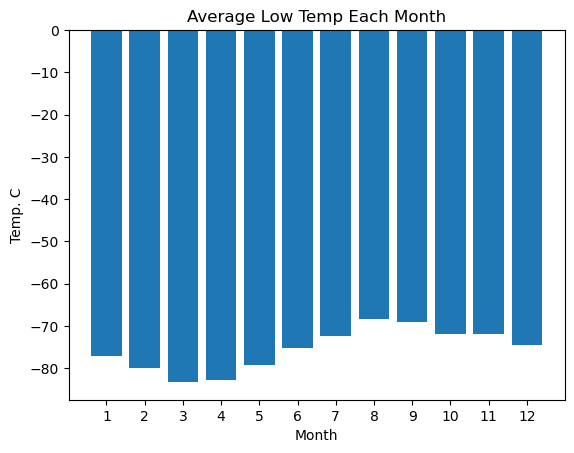

In [41]:
# Plot the average temperature by month
plt.bar(average_low.index, average_low.values)

plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Temp. C')
plt.title('Average Low Temp Each Month')

In [47]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = mars_df.loc[mars_df['min_temp'].idxmin(), 'month']
hottest_month = mars_df.loc[mars_df['min_temp'].idxmax(), 'month']

print(f'The hottest month is month', hottest_month, 'and the coldest month is', coldest_month)

The hottest month is month 1 and the coldest month is 3


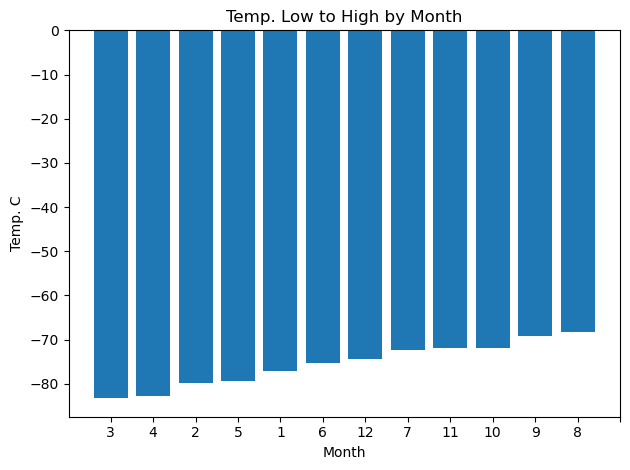

In [60]:
# Creating a graph for the temp as low to high
low_to_high = average_low.sort_values()

plt.bar(low_to_high.index.astype(str), low_to_high.values, align='center')
plt.xticks(range(0, 13))
plt.xlabel('Month')
plt.ylabel('Temp. C')
plt.title('Temp. Low to High by Month')
plt.tight_layout()

In [62]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

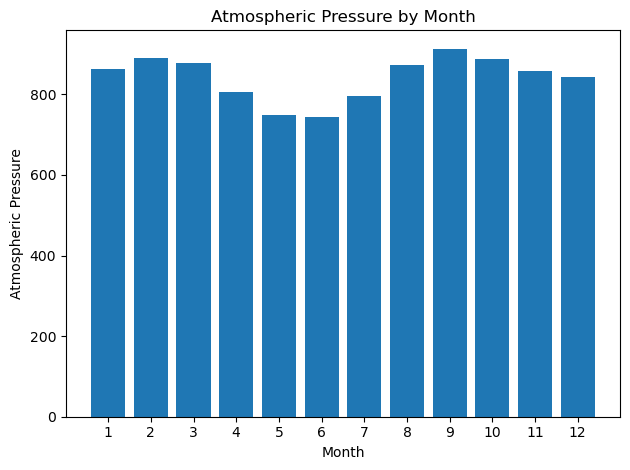

In [63]:
# Plot the average pressure by month
plt.bar(avg_pressure.index, avg_pressure.values)

plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(range(1, 13))
plt.title('Atmospheric Pressure by Month')

plt.tight_layout()

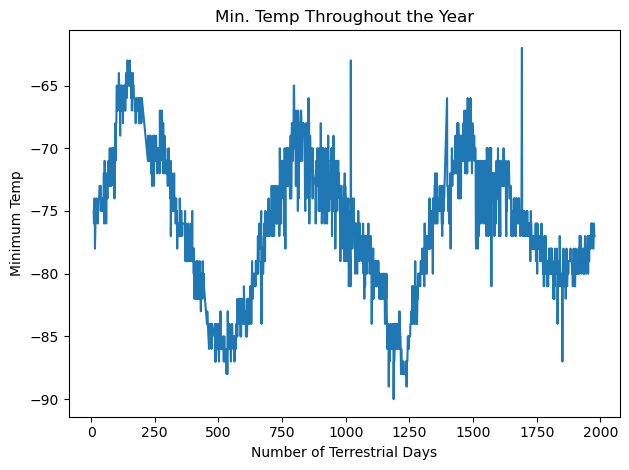

In [64]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(mars_df['sol'], mars_df['min_temp'])

plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temp')
plt.title('Min. Temp Throughout the Year')

plt.tight_layout()

In [67]:
# Write the data to a CSV
mars_df.to_csv('mars_temp_challenge.csv', index=False)

In [68]:
# End the automated browsing section
browser.quit()